# Sales Prediction

In [47]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [48]:
# Load the dataset
data = pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
# getting first 10 rows
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [50]:
# Drop the column unnamed which has index number
data = data.drop(data.columns[0], axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
# Summarizing the data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
# Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
data.shape

(200, 4)

In [20]:
# Checking for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

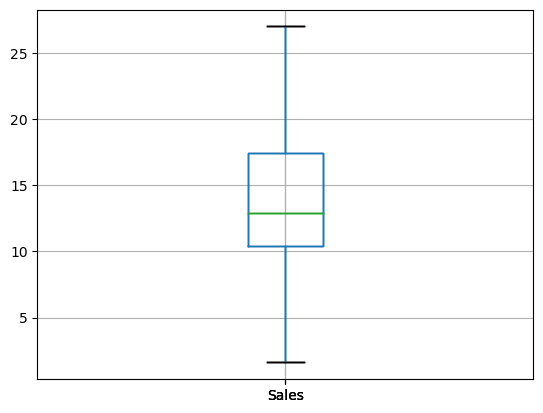

In [23]:
# Checking for outliers using box plot
data.boxplot(column=['Sales']);
plt.show()

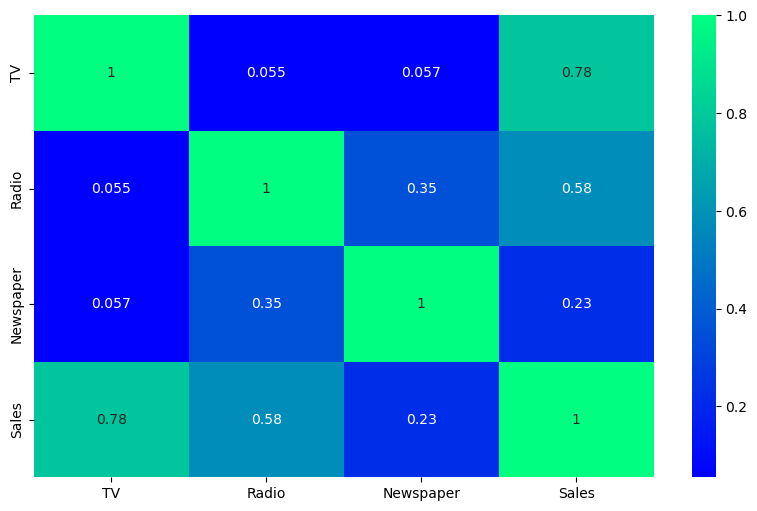

In [24]:
# Calculating the correlation
correlation = data.corr()

# plotting correlation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="winter")
plt.show()

In [25]:
# Selecting the target variable and setting correlation threshold
target = 'Sales'
threshold = 0.2

# Filtering the features based on correlation with the target variables
features = correlation[abs(correlation[target]) > threshold][target]

# Printing relevant features
print(features)

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


In [28]:
# Seperating features and the target variable
x = data.drop('Sales', axis=1) # feature(all columns except sales)
y = data['Sales'] # Target column(Sales)

In [31]:
# Splitting the dataset into traininf=g and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [39]:
# Using LinearRegression model
model = LinearRegression()

#Fitting the model
model.fit(x_train, y_train)    

LinearRegression()

In [46]:
# Predicting on the testing dataset
y_pred = model.predict(x_test)

# Calculating Mean squared error, root mean squeared, mean absolute error, r-squared score
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error: ", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)

r2 = r2_score(y_test, y_pred)
print("r2_score: ", r2)

Mean squared error:  3.1740973539761046
Root mean squared error:  1.7815996615334502
Mean absolute error:  1.4607567168117606
r2_score:  0.899438024100912


In [56]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


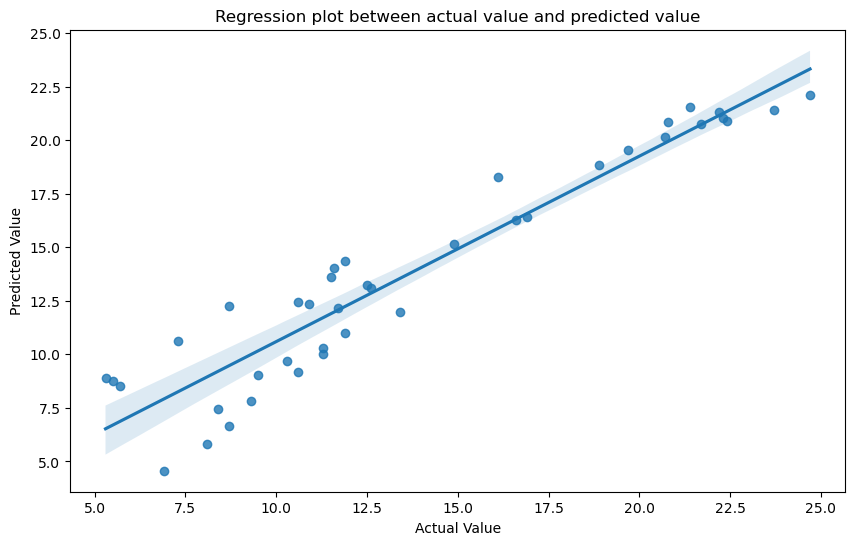

In [68]:
# Analyzing data by regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data, x=y_test, y=y_pred)
plt.title("Regression plot between actual value and predicted value")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value");
plt.show()

In [74]:
# Predicting with new values

new_data = pd.DataFrame([[100, 90.32, 12.43]], columns=['TV', 'Radio', 'Newspaper'])    

new_data_prediction = model.predict(new_data)

print("Predicted Sales: ", new_data_prediction)

Predicted Sales:  [24.57443703]
